# Investigating the use of DT and SVM on Supplier Selection calssfication problem

## Project objective
in this notebook we will investigate the effeciency of using DT model and SVC on the supplier selection problem using scklearn library as the main package for modeling. the section will be divided based on supervised phase and unsupervised phase into:

*   supervised phase for the DT, SVM, and Ensemble method for both models
*   unsupervised phase for the DT, SVM, and Ensemble method for both models



## Supervised phase using train data


### Import libraries and functions

In [2]:
# install required libraries
!pip install ISLP

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.utils import resample
from ISLP.svm import plot as plot_svm

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 544.7 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 701.4 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 860.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 883.3 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00


### Importing and bootstraping the data

In [48]:
# Import pseudo-data created by the team
training_df = pd.read_csv('training data.csv')
# show shape of the df
training_df.shape

(338, 7)

In [49]:
# print info of the df
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Quantity Ordered              338 non-null    int64  
 1   Quantity Received             338 non-null    int64  
 2   Percentage Quantity Received  338 non-null    float64
 3   Delivery DaysOn-Time Rating   338 non-null    int64  
 4   On-Time Rating                338 non-null    int64  
 5   Quality Rating                338 non-null    int64  
 6   Quantity Rating               338 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 18.6 KB


In [51]:
# bootstrap with replacment to scale the data to 10000 readings
training_df = resample(training_df,
                       replace=True,
                       n_samples= 10000,
                       random_state= 2023
                       ).reset_index().drop(columns='index')

# create y-label as an average function of the rating columns
rating_col_list = []

for col in training_df.columns:
    if 'Rating' in col:
        rating_col_list.append(col)
    else:
        continue

training_df["Avg_rating"] = training_df[rating_col_list].mean(axis=1).astype('int')

### Visualization to find correlations and outliers


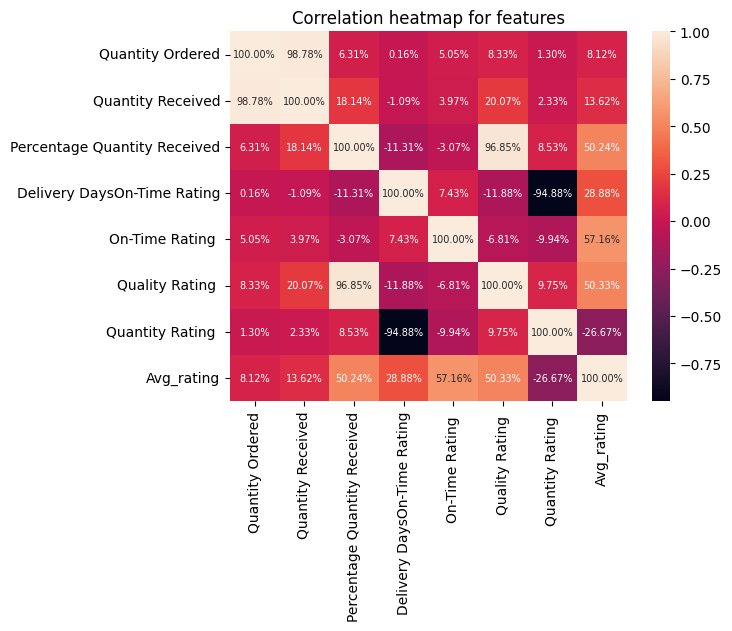

<Figure size 1000x1000 with 0 Axes>

In [52]:
# visualize correlation of features
sns.heatmap(training_df.corr(),
            annot=True,
            fmt=".2%",
            annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.figure(figsize=(10,10))
plt.show()

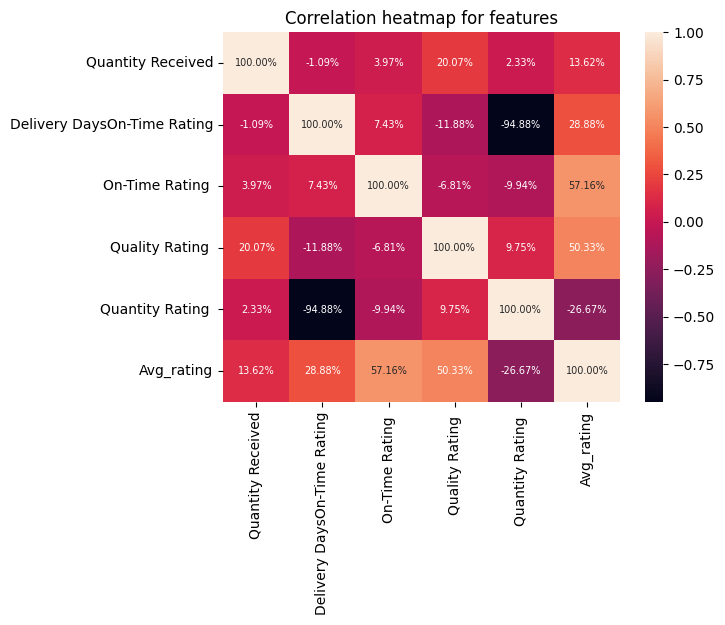

<Figure size 1000x1000 with 0 Axes>

In [53]:
# drop highly correlated columns to prevent colinearity
training_df = training_df.drop(
    columns=['Quantity Ordered',
    'Percentage Quantity Received']
    )

# visualize correlation of features
sns.heatmap(training_df.corr(),
            annot=True,
            fmt=".2%",
            annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.figure(figsize=(10,10))
plt.show()

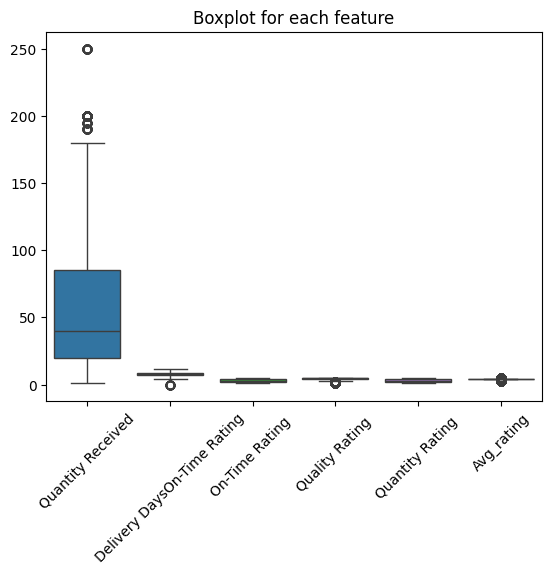

In [54]:
# visuailize boxplot for outlier screening
sns.boxplot(data=training_df)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
plt.show()

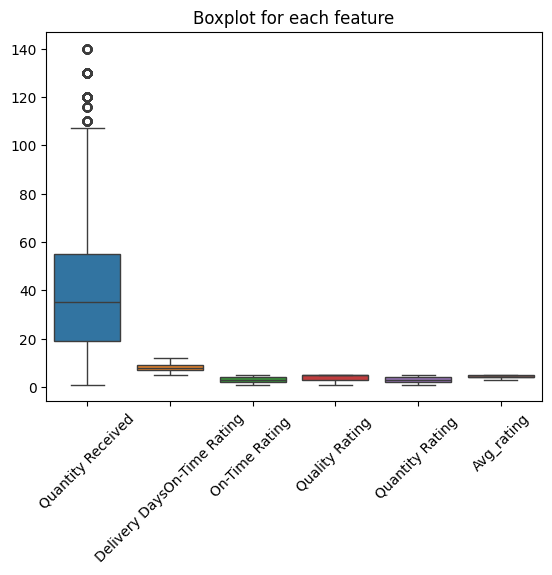

In [55]:
# remove outliers
training_df = training_df[
    (training_df['Quantity Received']
    <np.quantile(training_df['Quantity Received'],0.90))
    &
    (training_df['Delivery DaysOn-Time Rating']
    >np.quantile(training_df['Delivery DaysOn-Time Rating'],0.01))
                          ]

# visuailize boxplot for outlier screening
sns.boxplot(data=training_df)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
plt.show()

Due to bad quality of the data provided. removing outliers created more outliers. therefore, the quantiles defined for removing outliers was loosely defined from 1% to 90% of the data

### Modeling module

### Data preparation

In [68]:
# subset features and labels
X = training_df.drop(columns='Avg_rating')
Y = training_df['Avg_rating']

# split train and test data
X_train,X_test,Y_train, Y_test = train_test_split(X,
                                                  Y,
                                                  test_size= 0.15,
                                                  random_state=198)
# define K-fold cross-validation
kf = KFold(n_splits=10,
            shuffle=True,
            random_state=198)


### Decision Tree Model

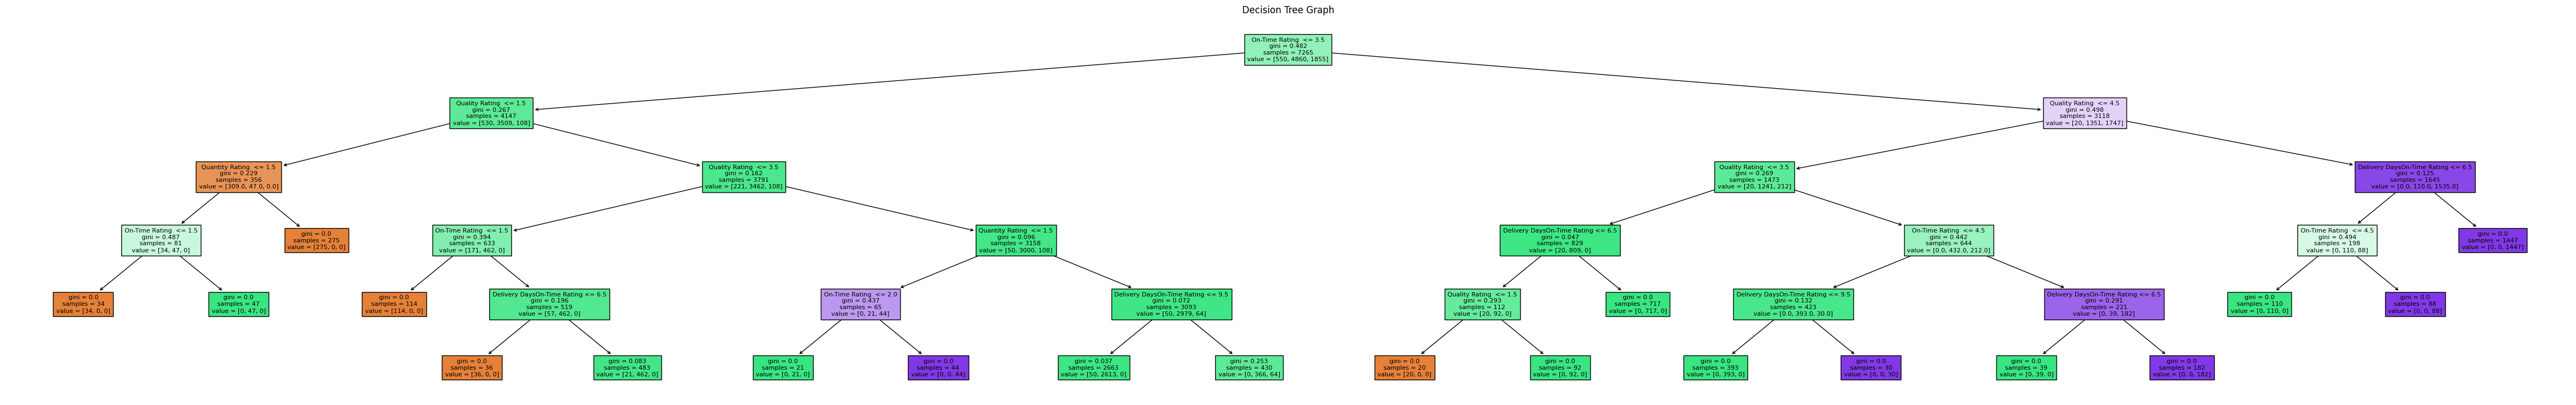

ACCURACY= 0.9844115354637568 
 MSE= 0.01558846453624318
              precision    recall  f1-score   support

           3       1.00      0.89      0.94       100
           4       0.98      1.00      0.99       882
           5       1.00      0.97      0.98       301

    accuracy                           0.98      1283
   macro avg       0.99      0.95      0.97      1283
weighted avg       0.98      0.98      0.98      1283



In [69]:
# create DT model
dt = DecisionTreeClassifier(max_depth=5)

# model fitting
dt.fit(X_train, Y_train)

# visualizing DT calssification
plt.figure(figsize=(60,9))
plot_tree(dt,
            feature_names= X.columns,
            filled=True,
            fontsize=8)

plt.title('Decision Tree Graph')
plt.show()

# find accuracy and mean squared error for one iteration
y_pred_dt = dt.predict(X_test)
print('ACCURACY=',
      accuracy_score(Y_test, y_pred_dt),
      '\n',
      'MSE=',MSE(Y_test, y_pred_dt))

# create classification report
cr = classification_report(Y_test, y_pred_dt)

print(cr)

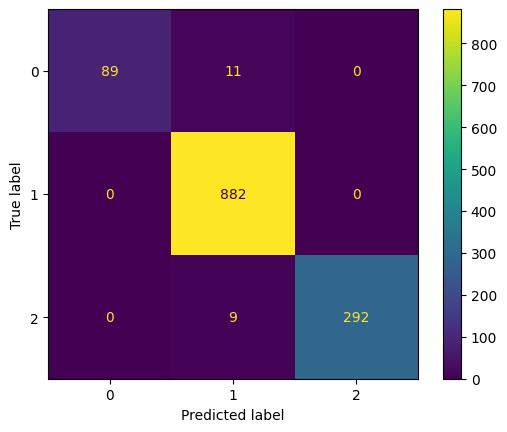

<Figure size 1600x900 with 0 Axes>

In [70]:
# visualizing confusion matrices
cm = confusion_matrix(Y_test,
                      y_pred_dt,
                      labels=None,
                      sample_weight=None,
                      normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(16,9))
plt.show()

CV mean = 0.981867784214635 
 CV std = 0.0038859695357499045


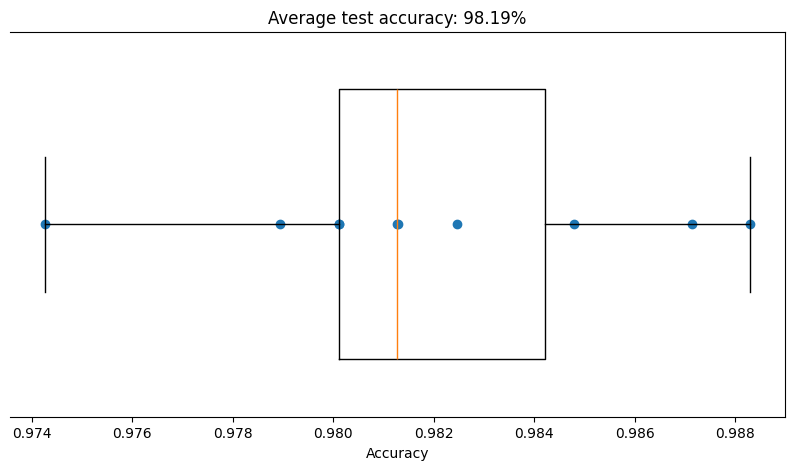

In [71]:
#find CV accuracy score for 1 iteration
cv_score = cross_val_score(dt, X, Y, cv=kf)
print('CV mean =',cv_score.mean(),'\n',
      'CV std =',cv_score.std())

#visualize CV average score for n_cv iteration 
n_cv= 10
f, ax = plt.subplots(figsize=(10,5))
ax.boxplot(cv_score,
           vert=False,
           widths=.7)
ax.scatter(cv_score,np.ones(10))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {cv_score.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.show()

### SVC model

ACCURACY= 0.8176149649259548 
 MSE= 0.18238503507404522
              precision    recall  f1-score   support

           3       1.00      0.12      0.21       100
           4       0.81      0.96      0.88       882
           5       0.84      0.64      0.72       301

    accuracy                           0.82      1283
   macro avg       0.88      0.57      0.61      1283
weighted avg       0.83      0.82      0.79      1283



c:\Users\moham\anaconda3\envs\ISLP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


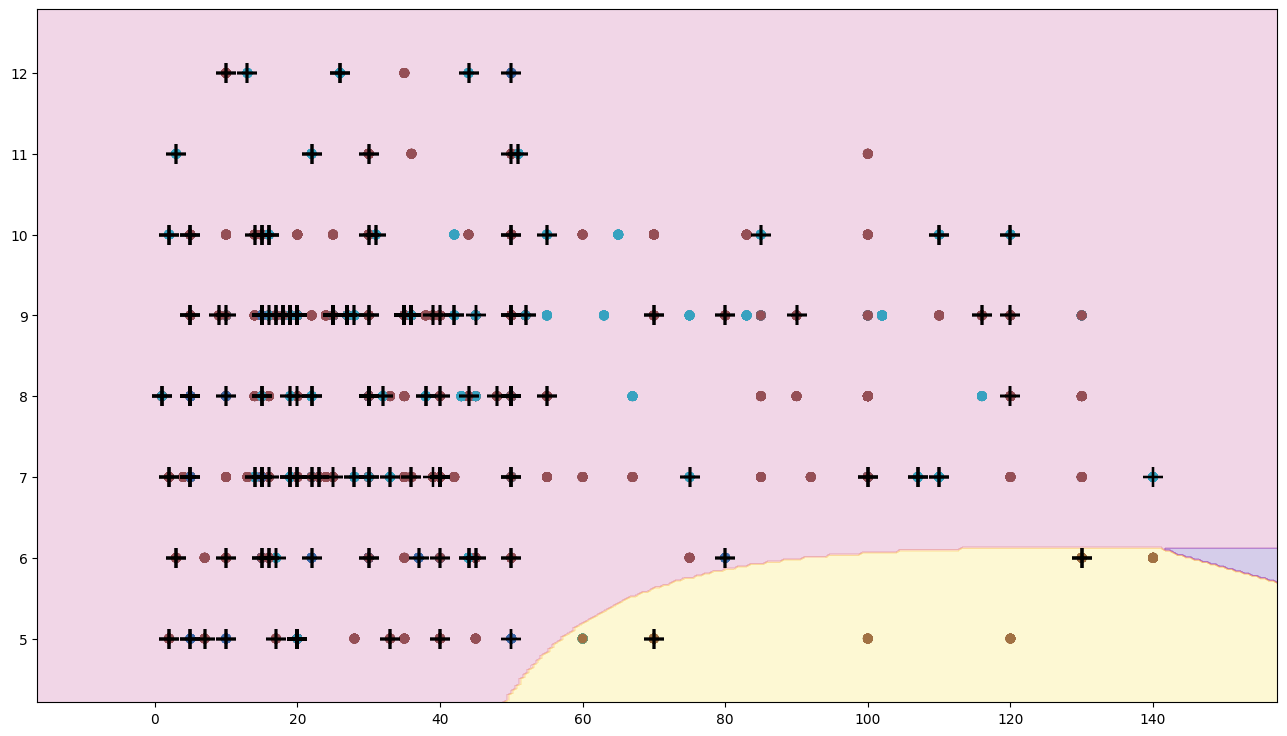

In [72]:
# Here we replicate what was preformed on previous dt model but with SVM
svm_model = svm.SVC(C=10,
                    kernel='poly').fit(X_train, Y_train)

# find accuracy and mean squared error for one iteration
y_pred_svc = svm_model.predict(X_test)
print('ACCURACY=',
      accuracy_score(Y_test, y_pred_svc),
      '\n',
      'MSE=',MSE(Y_test, y_pred_svc))

# create classification report
cr = classification_report(Y_test, y_pred_svc)
print(cr)


#visualize SVM calssification
fig, ax = plt.subplots(figsize=(16,9))
plot_svm(X_train,
         Y_train,
         svm_model,
         ax=ax)

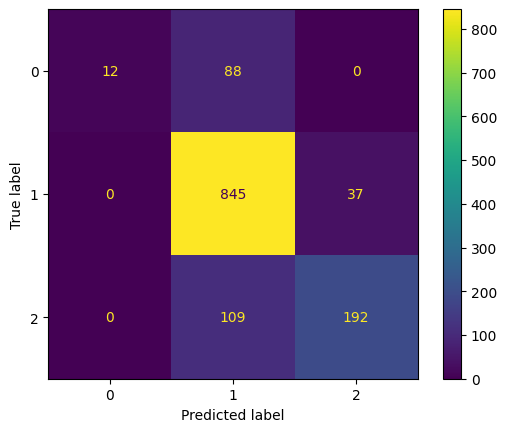

<Figure size 1600x900 with 0 Axes>

In [73]:
# visualizing confusion matrices
cm = confusion_matrix(Y_test,
                      y_pred_svc,
                      labels=None,
                      sample_weight=None,
                      normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(16,9))
plt.show()

CV mean = 0.8080264869824836 
 CV std = 0.011142145449128992


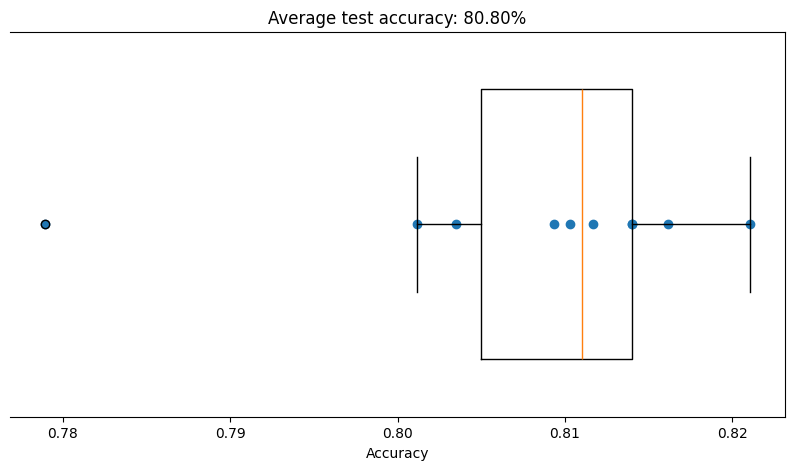

In [74]:
#find CV accuracy score for 1 iteration
cv_score = cross_val_score(svm_model, X, Y, cv=kf)
print('CV mean =',cv_score.mean(),'\n',
      'CV std =',cv_score.std())

#visualize CV average score for n_cv iteration 
n_cv= 10
f, ax = plt.subplots(figsize=(10,5))
ax.boxplot(cv_score,
           vert=False,
           widths=.7)
ax.scatter(cv_score,
          np.ones(n_cv))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {cv_score.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.show()

### Ensemble method to combine both accuracies

In [75]:
# creating and fitting ensemble model to combine DT and SVM predictive powers
ensemble_clf = VotingClassifier(estimators=
                                [('dt', dt), ('svm', svm_model)],
                                voting='hard')
ensemble_clf.fit(X_train, Y_train)
y_pred_en = ensemble_clf.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(Y_test, y_pred_en))
print('MSE=',MSE(Y_test, y_pred_en))

Ensemble Model Accuracy: 0.9010132501948558
MSE= 0.0989867498051442


## unsupervised phase using test data

In [77]:
# Import and resample data for testing
testing_df = pd.read_csv('testing data.csv')
testing_df = resample(testing_df,
               replace=True,
               n_samples = 10000).reset_index().drop(
               columns=['index','Supplier Name'])

### Visualizing correlations and outliers

C:\Users\moham\AppData\Local\Temp\ipykernel_21672\4223129862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(testing_df.corr(),


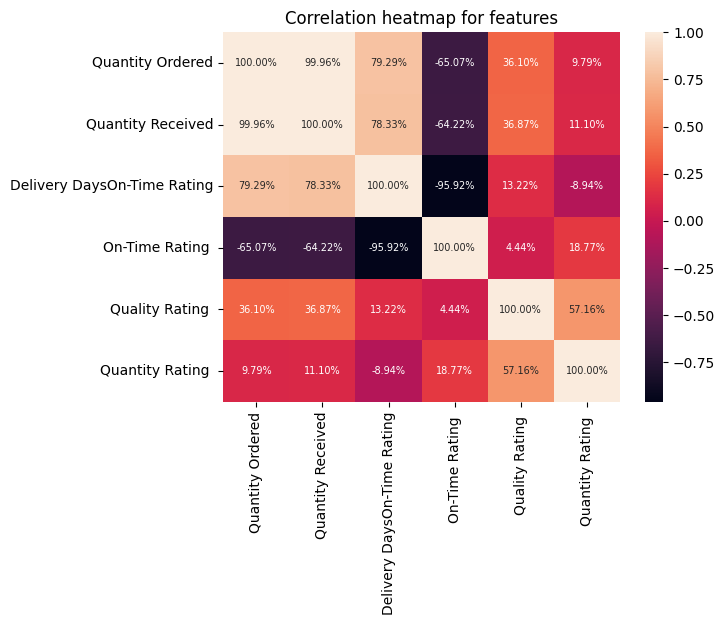

In [79]:
# visualize correlation of features
sns.heatmap(testing_df.corr(),
            annot=True,
            fmt=".2%",
            annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

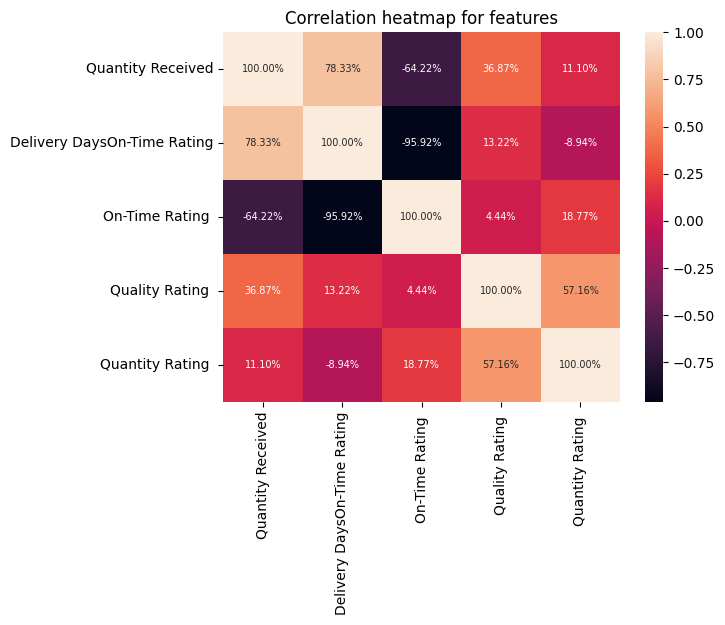

In [80]:
# drop highly correlated columns to prevent colinearity
testing_df = testing_df.drop(columns=
                             ['Quantity Ordered',
                              'Percentage Quantity Received'])

# visualize correlation of features
sns.heatmap(testing_df.corr(),annot=True,fmt=".2%",annot_kws={"size":7})
plt.title('Correlation heatmap for features')
plt.show()

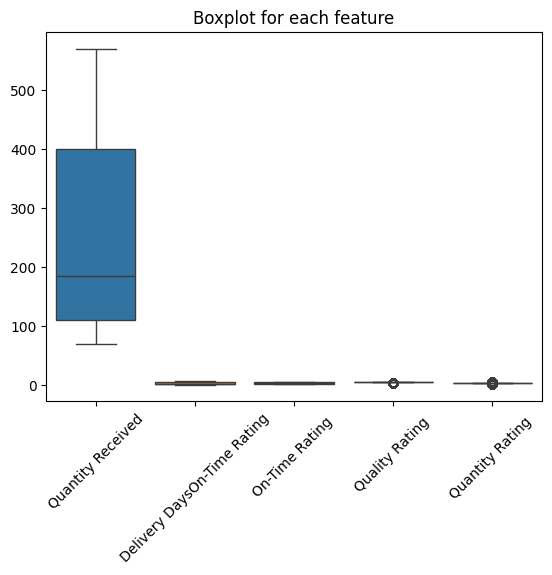

In [81]:
# visualize boxplot for outlier screening
sns.boxplot(data=testing_df)
plt.title('Boxplot for each feature')
plt.xticks(rotation=45)
plt.show()

### Applying all models on test data



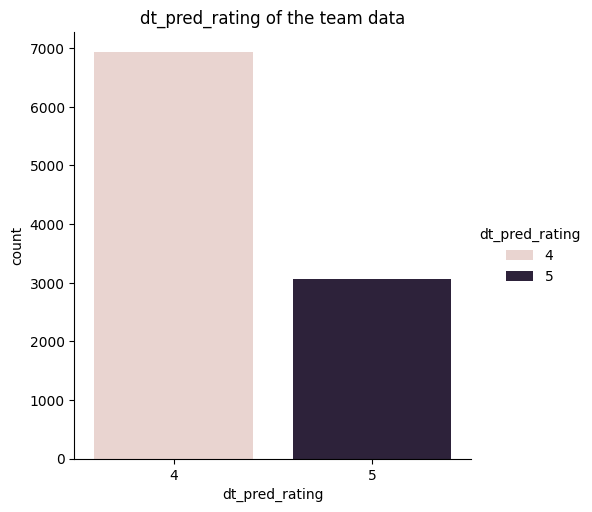

<Figure size 1600x900 with 0 Axes>

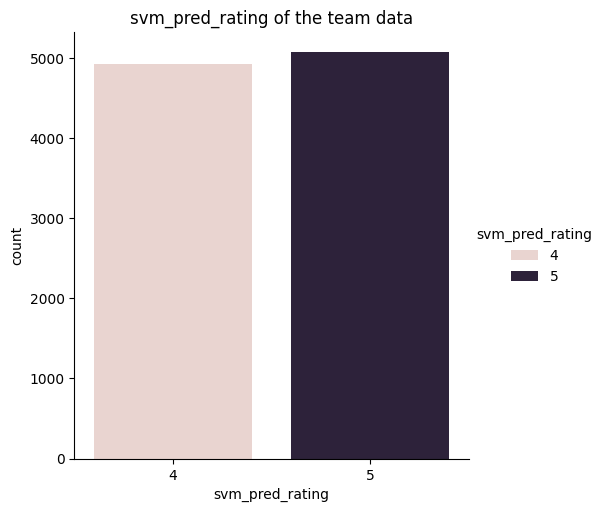

<Figure size 1600x900 with 0 Axes>

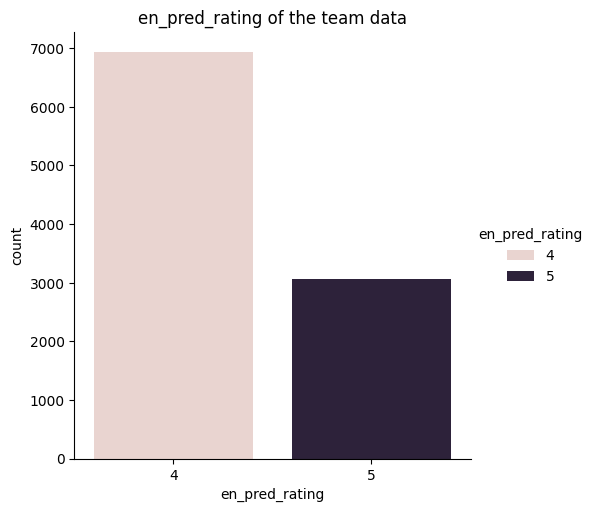

<Figure size 1600x900 with 0 Axes>

In [82]:
# Predicting labels of the 3 models
dt_label = dt.predict(testing_df)
svm_label = svm_model.predict(testing_df)
en_label = ensemble_clf.predict(testing_df)
testing_df['dt_pred_rating'] = dt_label
testing_df['svm_pred_rating'] = svm_label
testing_df['en_pred_rating'] = en_label

# visualizing count plot for 3 models
models_rating_cols = ['dt_pred_rating',
                      'svm_pred_rating',
                      'en_pred_rating']
for col in models_rating_cols:
    sns.catplot(data=testing_df,
                x=col,
                kind='count',
                hue=col)
    plt.title(f'{col} of the team data')
    plt.figure(figsize=(16,9))
    plt.show()


## Result

print best rated supplier for each class for the 3 different models

In [83]:
n = 5 # number of expected classes

# sort best rated supplier in each class
for col in models_rating_cols:
  result_sorting = testing_df.sort_values(by=[col],
                                             ascending=False)
  print(f"Sorting for {col}")
  
  for i in range(n,0,-1):
    if i in result_sorting[col].unique():
     print(result_sorting[result_sorting[col]== i]
      [col].head(1).to_string())
    else:
      continue

Sorting for dt_pred_rating
1995    5
5914    4
Sorting for svm_pred_rating
0    5
9711    4
Sorting for en_pred_rating
1995    5
5914    4
